**Assignment 4: Supervised learning model (Decision tree)**  
Team:  
*   Nelly Fernanda torres Ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Ana Sofía Vara Buentello 2109189
*   Guillermo Gil Flores 1963954
*   Mauricio Alejandro Olivares Mata 1973006

Teacher: Daniel Isaías López Páez  
Class: Artificial Intelligence   
Class schedule: N4, 3

In [1]:
#Import libraries to be used in the code
import numpy as np #advanced mathematics
import pandas as pd #data structures
from sklearn.datasets import load_breast_cancer #load breast cancer dataset
from sklearn.model_selection import train_test_split #divides data into training and testing
from sklearn.tree import DecisionTreeClassifier, plot_tree #model to be trained and to graph the tree
from sklearn.metrics import accuracy_score, classification_report #evaluate model
import matplotlib.pyplot as plt #plot

In [2]:
#Load the dataset (we use the breast cancer dataset that already comes with scikit-learn)
data = load_breast_cancer() #a real data set of breast cancer patients is stored in the variable data
X = data.data  #tumor characteristics (variables to learn)
y = data.target  #diagnostic labels: 0 = malignant, 1 = benign (variables to be predicted)


In [3]:
#Data preprocessing
#Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,  #features
    y,  #labels
    test_size=0.2,   #20% of the data will be for testing
    random_state=40  #makes the division reproducible
)

In [4]:
#Model
clf = DecisionTreeClassifier(random_state=1)  #builds decision tree classifying data
clf.fit(X_train, y_train)  #train the model with features and training labels

DecisionTreeClassifier(random_state=1)

In [6]:
#Model evaluation
sample_predictions = clf.predict(X_test[:3]) #uses the model to make 3 predictions of the test set
print("Three predictions of the model:", sample_predictions) #prints predictions (benign or malignant)

#Evaluate the model with the whole test set
total_predictions = clf.predict(X_test)

Three predictions of the model: [1 0 1]


In [7]:
#Model accuracy
accuracy = accuracy_score(y_test, total_predictions) #compares actual labels with model predictions
print("Model accuracy:", accuracy)

Model accuracy: 0.9473684210526315


In [8]:
#Classification report
print("Classification report:\n", classification_report(y_test, total_predictions, target_names=data.target_names))

Classification report:
               precision    recall  f1-score   support

   malignant       0.88      0.97      0.93        39
      benign       0.99      0.93      0.96        75

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



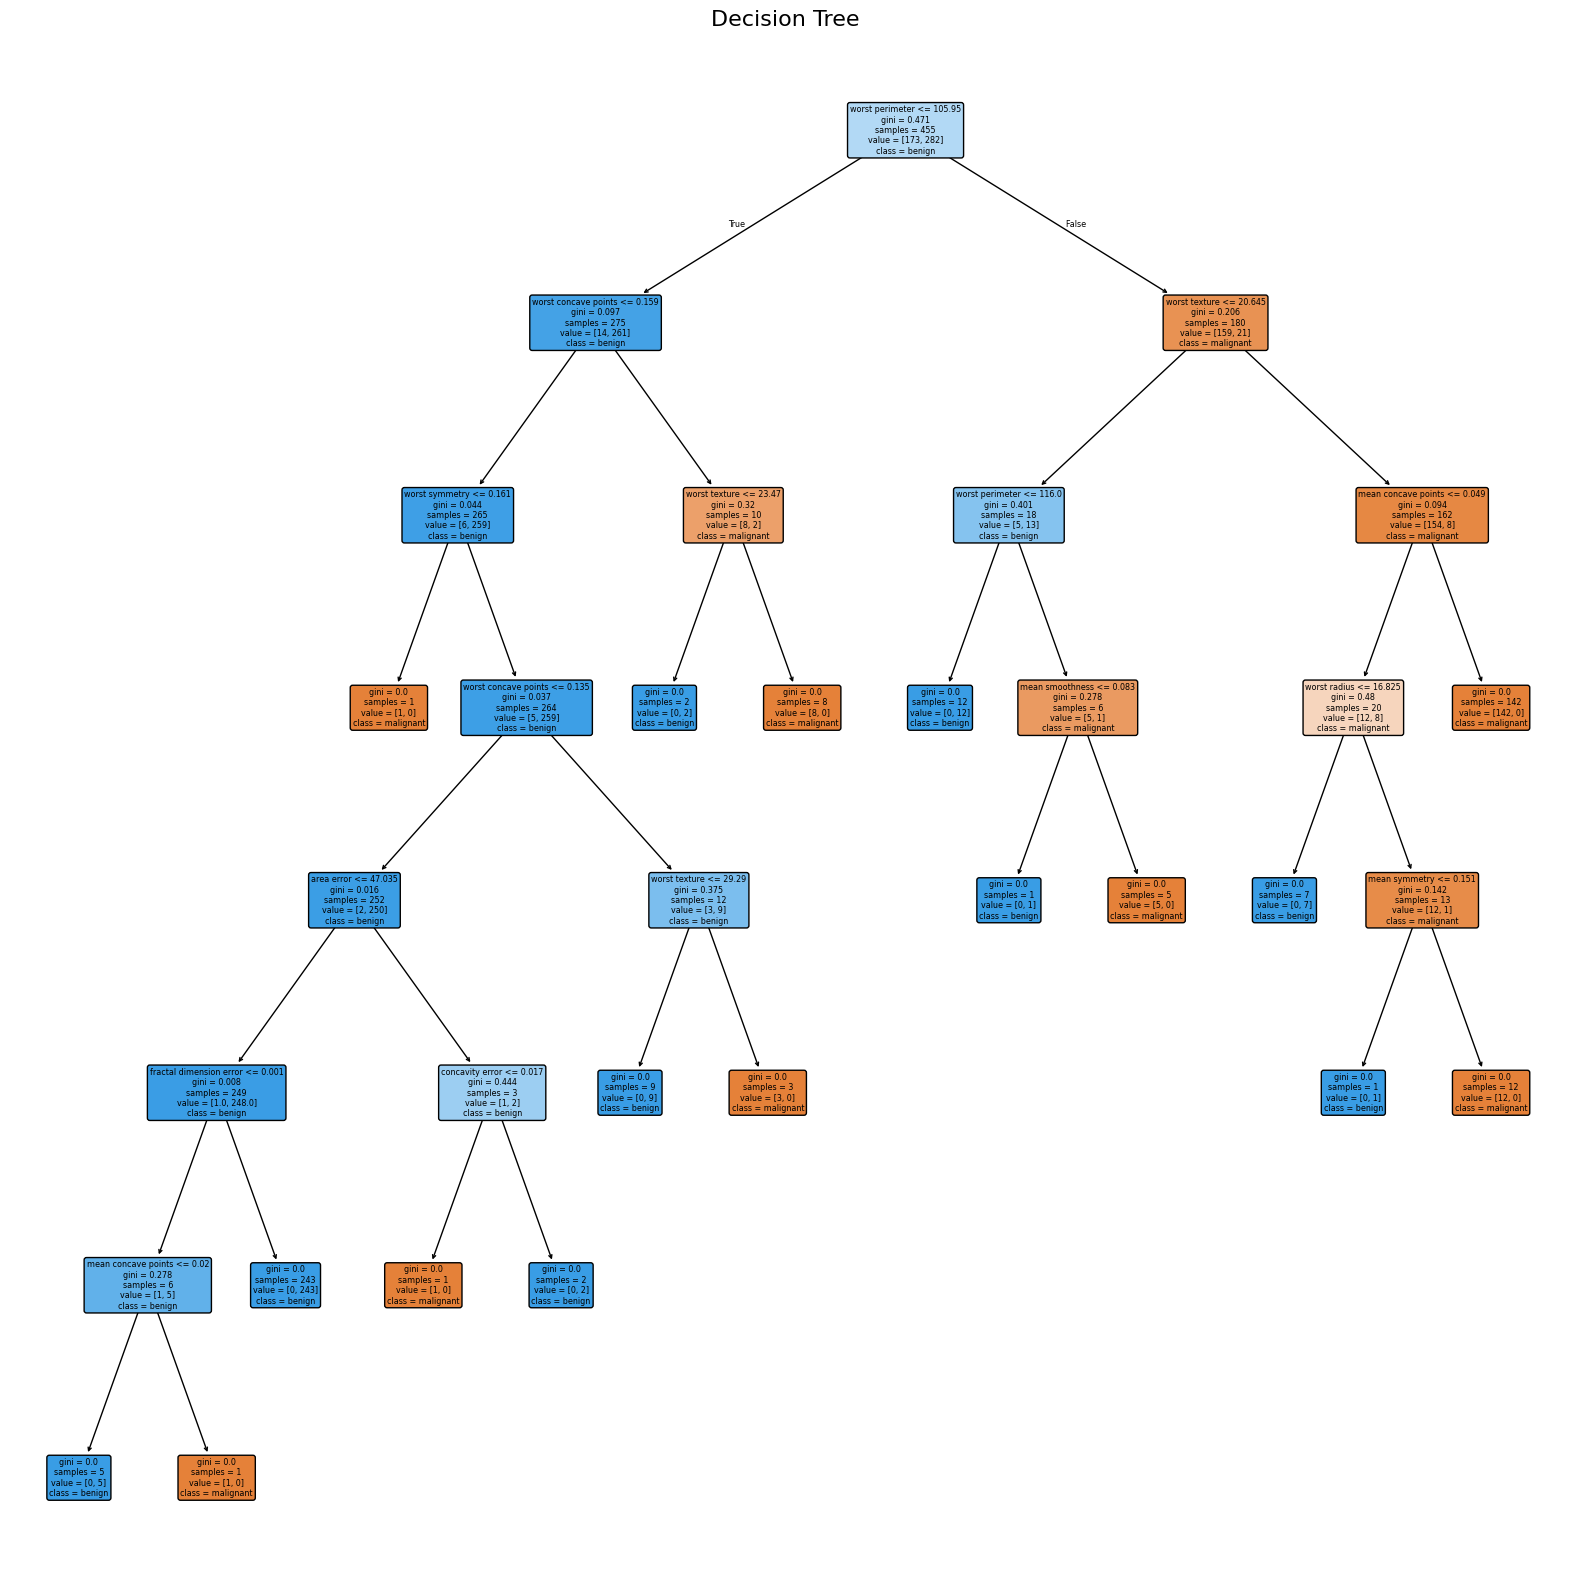

In [9]:
#Visualization of the decision tree
plt.figure(figsize=(20,20))  #figure to show graph
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree", fontsize=16, loc='center')
plt.savefig("decision_tree.png", dpi=300)  #save image as .png in high resolution
plt.show()